In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


#**Analysis ISW reports**
---

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1xRYboqMvGzSU_DBXBnn2ToH7Zx_Va4KI')

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

###**Creating new columns for easier analysis**

In [ ]:
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])

In [ ]:
# 1. Split texts into words
df["Words"] = df["Bold Text"].apply(lambda x: x.lower().split() if isinstance(x, str) else [])

# 2. Text length
df["Word Count"] = df["Words"].apply(len)

# 3. Unique words
df["Unique Words"] = df["Words"].apply(lambda x: len(set(x)))

In [ ]:
df.head()

,Year,Month,Day,Bold Text,Date,Words,Word Count,Unique Words
0,2022,2,28,russia deploy addit heavi forc artilleri far f...,2022-02-28,"[russia, deploy, addit, heavi, forc, artilleri...",181,110
1,2022,3,1,russian forc set condit envelop kyiv west atte...,2022-03-01,"[russian, forc, set, condit, envelop, kyiv, we...",197,125
2,2022,3,2,russian forc resum offens oper kyiv western ou...,2022-03-02,"[russian, forc, resum, offens, oper, kyiv, wes...",165,96
3,2022,3,3,russian forc open new line advanc belaru south...,2022-03-03,"[russian, forc, open, new, line, advanc, belar...",167,114
4,2022,3,4,russian forc advanc rapidli eastern outskirt k...,2022-03-04,"[russian, forc, advanc, rapidli, eastern, outs...",120,83


###**Top 25 most used words**

In [ ]:
all_words = [word for words in df["Words"] for word in words]
word_freq = Counter(all_words)
common_words = word_freq.most_common(25)

In [ ]:
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
print(common_words_df)

         Word  Frequency
0     russian      35393
1   ukrainian      13760
2        forc       9289
3      oblast       9091
4      ukrain       8800
5      effort       7688
6    militari       6959
7      report       6792
8      object       6284
9     continu       5920
10        isw       5647
11       area       5056
12       oper       4987
13     russia       4864
14      activ       4636
15        use       4037
16        map       3550
17     belaru       3528
18    donetsk       3379
19    western       3345
20       main       3105
21    conduct       2827
22      mobil       2826
23     offens       2800
24      gener       2726


###**Visualisation**
---

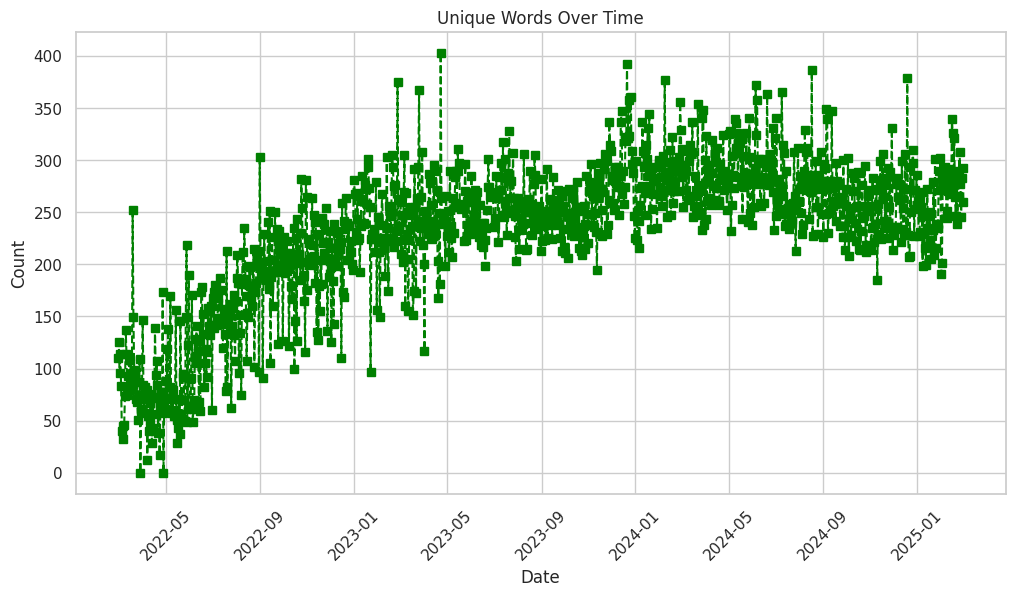

In [ ]:
# 1. Trending unique words
plt.plot(df["Date"], df["Unique Words"], marker="s", linestyle="--", color="green")
plt.title("Unique Words Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*The graph shows the increase in word count in reports over time, reflecting a general trend of increasing text volume.*

*Word count varies, but overall there is a gradual increase, especially after 2022, with a peak in periods of active hostilities.*

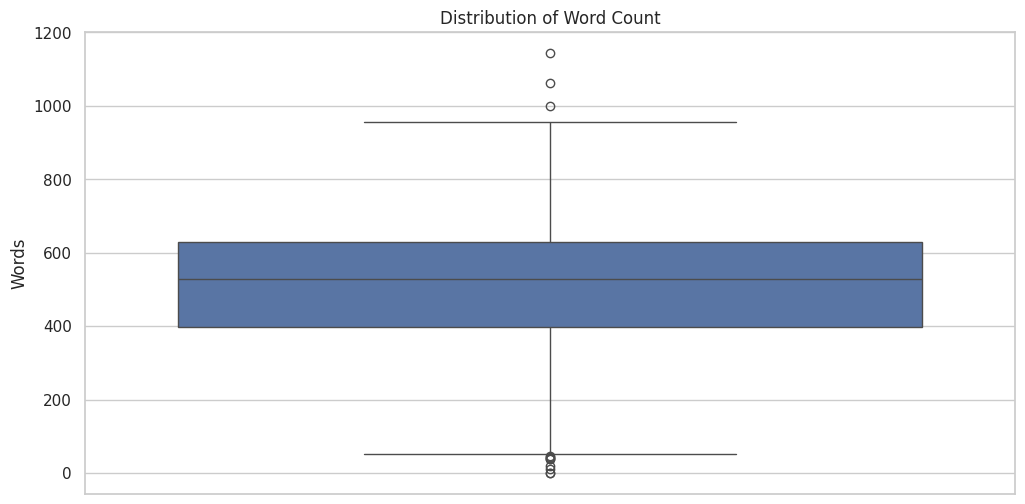

In [ ]:
# 2. Boxplot of lengths
sns.boxplot(y="Word Count", data=df)
plt.title("Distribution of Word Count")
plt.ylabel("Words")
plt.show()

**Median**: *The average value (represented by the horizontal line in the box) is approximately 600 words.*

**Interquartile range (IQR)**: *The box represents the 50% of the data, with 25% below and 25% above the median. This indicates that half of all word values ​​fall between 400 and 600.*

**Outliers**: *The graph shows several points above the upper boundary of the box, which may indicate extreme values ​​in the form of very large numbers of words.*

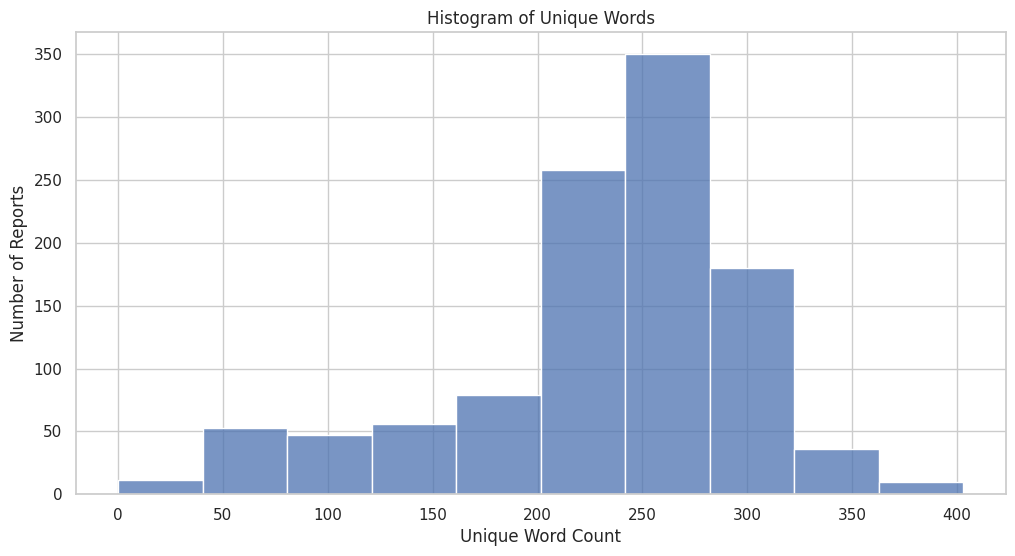

In [ ]:
# 3. Unique words
sns.histplot(df["Unique Words"], bins=10)
plt.title("Histogram of Unique Words")
plt.xlabel("Unique Word Count")
plt.ylabel("Number of Reports")
plt.show()

*Most reports contain between 200 and 250 unique words, which may indicate the diversity of vocabulary used.*

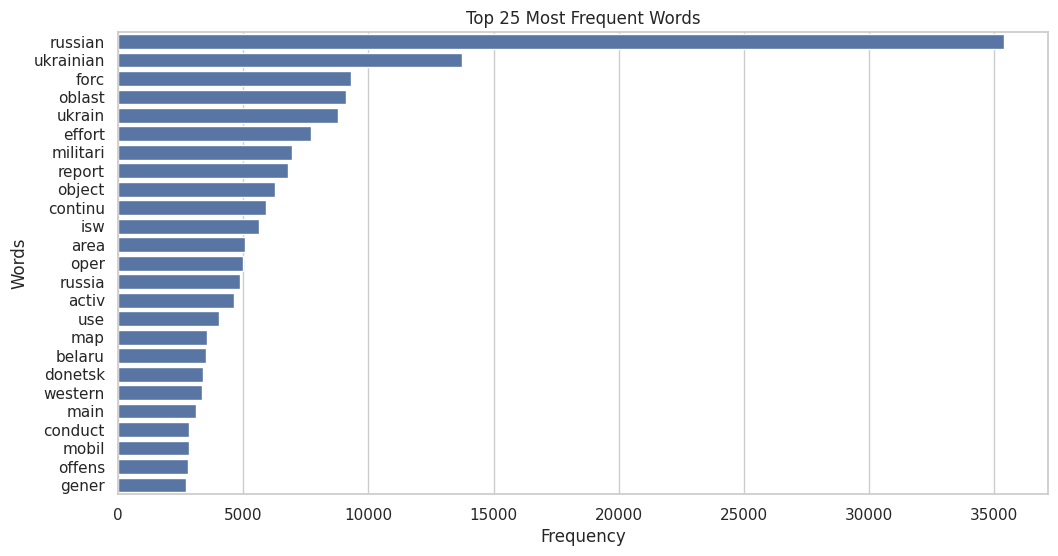

In [ ]:
# 4. Frequent words (Top 25)
words, freqs = zip(*common_words)
sns.barplot(x=list(freqs), y=list(words))
plt.title("Top 25 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

*In general, the articles focus on the analysis of military actions and the situation in Ukraine, with an emphasis on the Russian-Ukrainian conflict, with the possible inclusion of information on regional specificities and the international context.*

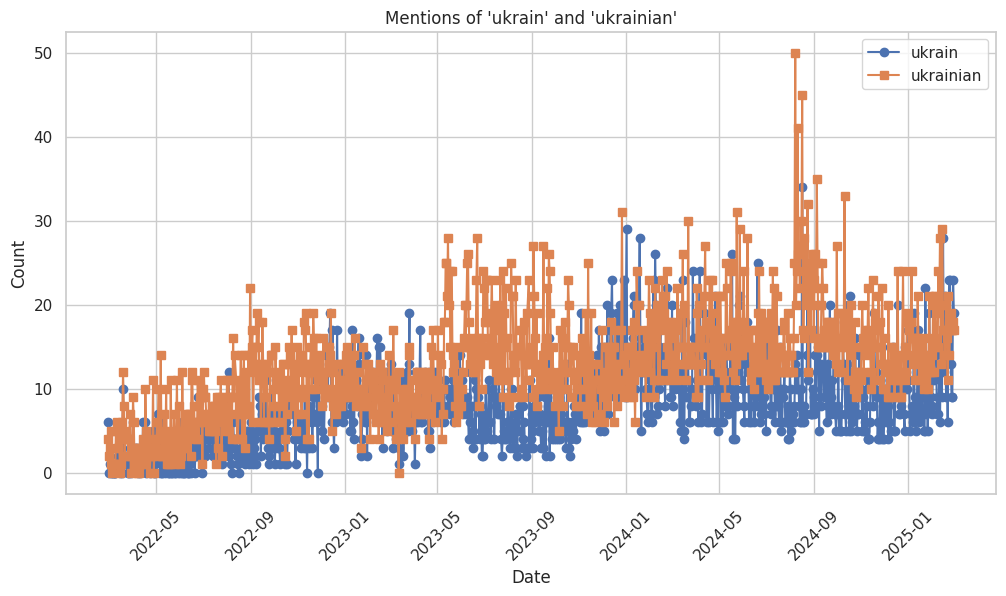

In [ ]:
# 5. Mentions of 'ukrain' and 'ukrainian' separately
df["ukrain"] = df["Words"].apply(lambda x: x.count("ukrain"))
df["ukrainian"] = df["Words"].apply(lambda x: x.count("ukrainian"))

plt.plot(df["Date"], df["ukrain"], label="ukrain", marker="o")
plt.plot(df["Date"], df["ukrainian"], label="ukrainian", marker="s")
plt.legend()
plt.title("Mentions of 'ukrain' and 'ukrainian'")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

*The use of these words has slowly increased each year, with an unexpected increase occurring in the second half of 2024.*

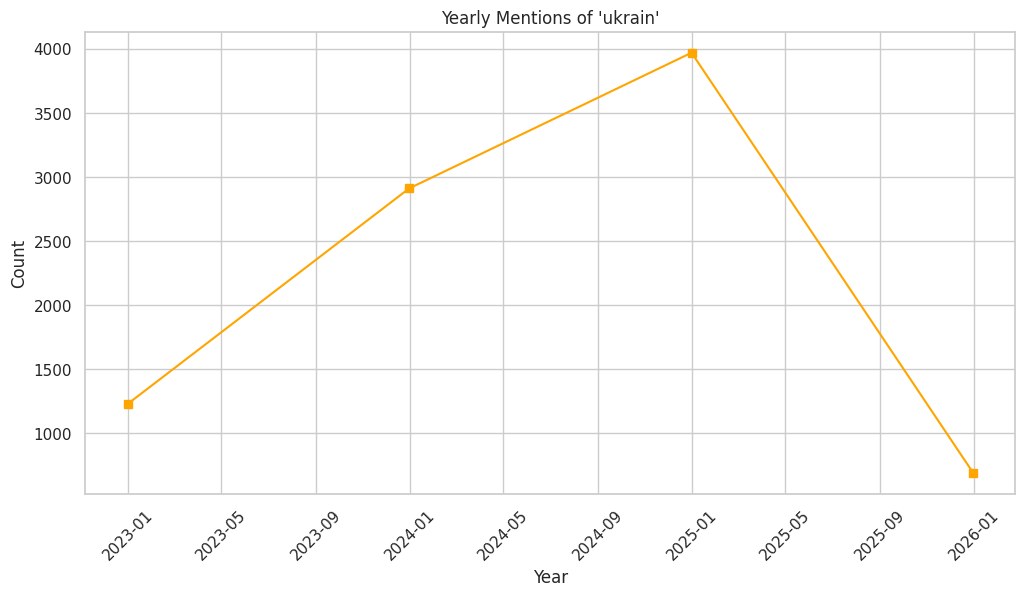

In [ ]:
# 6. Yearly Trends Analysis
yearly_trends = df.resample('YE', on='Date').sum()
plt.plot(yearly_trends.index, yearly_trends['ukrain'], marker='s', color='orange')
plt.title("Yearly Mentions of 'ukrain'")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*The use of these words has slowly increased each year, and we cannot analyze 2025 qualitatively due to lack of data, as the data for 2025 only goes back to March.*

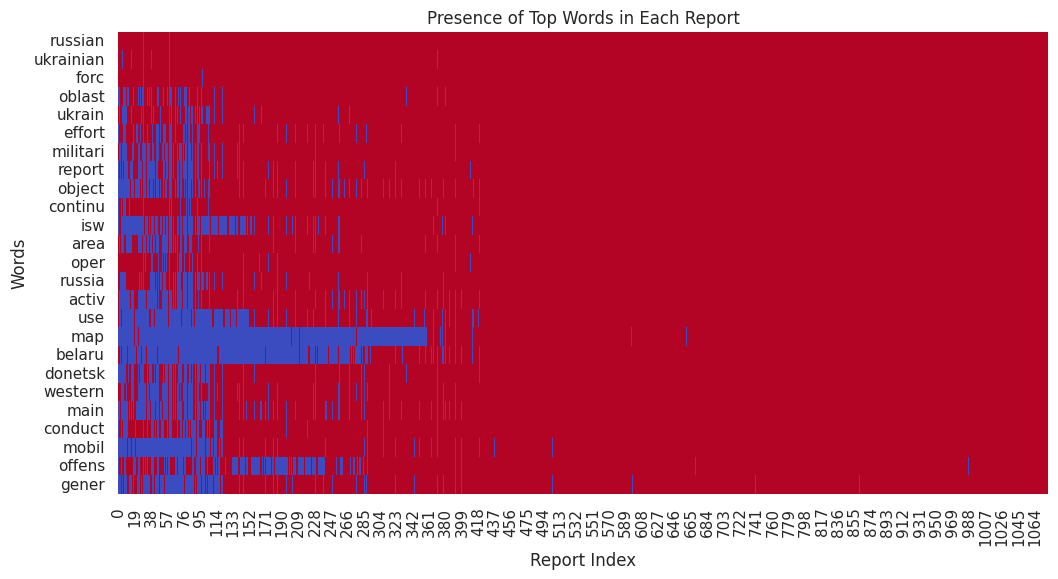

In [ ]:
# 7. Heatmap of the most frequent word occurrences
top_words = [w for w, _ in common_words]
def presence_vector(word_list):
    return [1 if word in word_list else 0 for word in top_words]

presence_data = df["Words"].apply(presence_vector).tolist()
presence_df = pd.DataFrame(presence_data, columns=top_words)

sns.heatmap(presence_df.T, cmap="coolwarm", cbar=False)
plt.title("Presence of Top Words in Each Report")
plt.xlabel("Report Index")
plt.ylabel("Words")
plt.show()

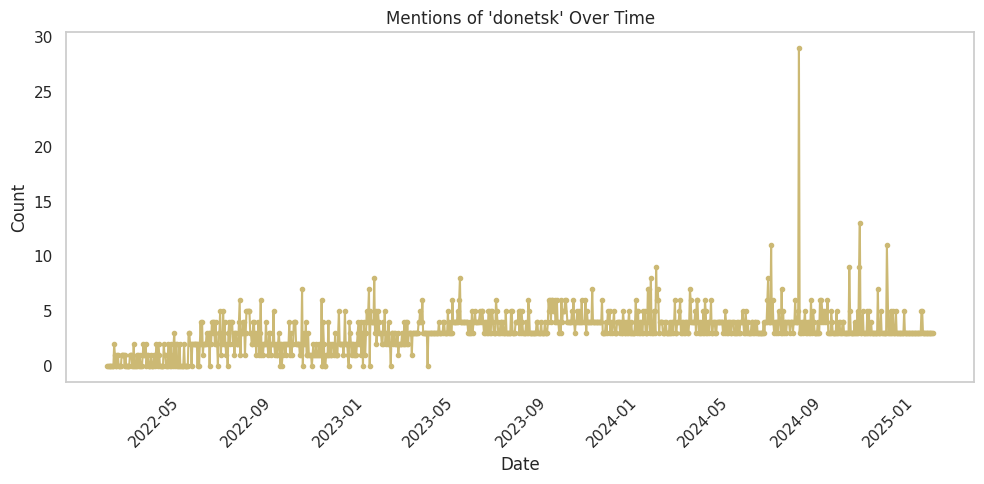

In [ ]:
# 8. Mentions of "donetsk" over time
df["donetsk"] = df["Words"].apply(lambda words: words.count("donetsk"))

plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["donetsk"], marker='.', linestyle='-', color='y')
plt.title("Mentions of 'donetsk' Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

*The increase in mentions of Donetsk during critical dates of hostilities in the east is clearly visible.*

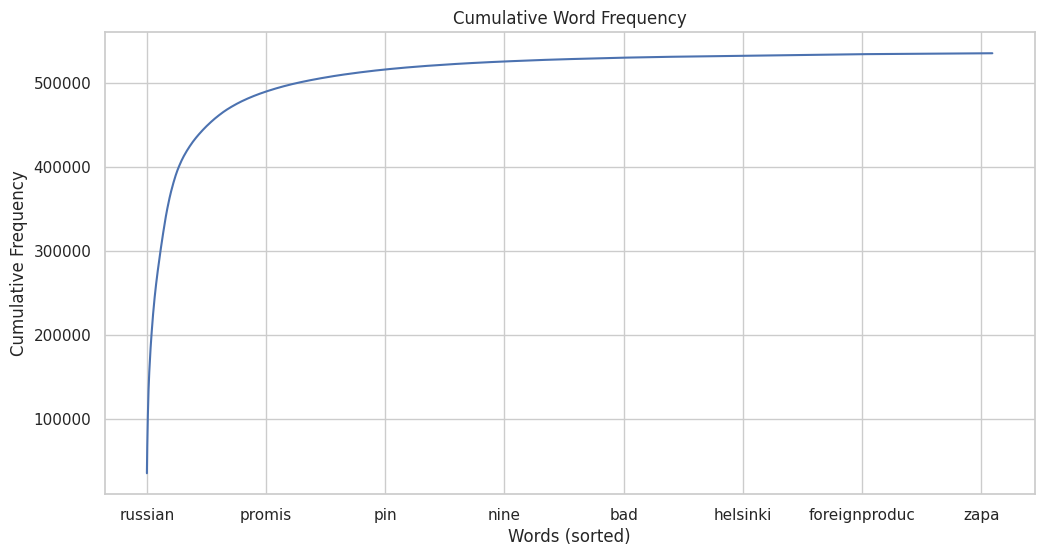

In [ ]:
# 9. Frequency cumulative curve
freq_series = pd.Series(dict(word_freq)).sort_values(ascending=False)
freq_series.cumsum().plot()
plt.title("Cumulative Word Frequency")
plt.xlabel("Words (sorted)")
plt.ylabel("Cumulative Frequency")
plt.grid(True)
plt.show()

*The graph shows that a few words (first on the left) are much more commonly used than others.
This is typical behavior in languages ​​where a small number of words are used more often (easy-to-understand high-frequency words), while the rest of the words have lower popularity.*

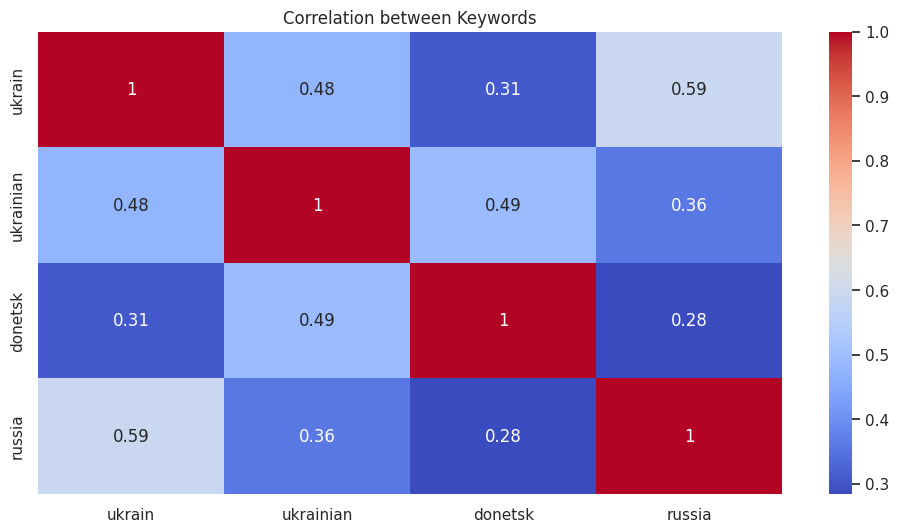

In [ ]:
# 10. Correlation Matrix for Keyword Mentions
df["russia"] = df["Words"].apply(lambda words: words.count("russia"))

correlation_matrix = df[['ukrain', 'ukrainian', 'donetsk', 'russia']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Keywords")
plt.show()

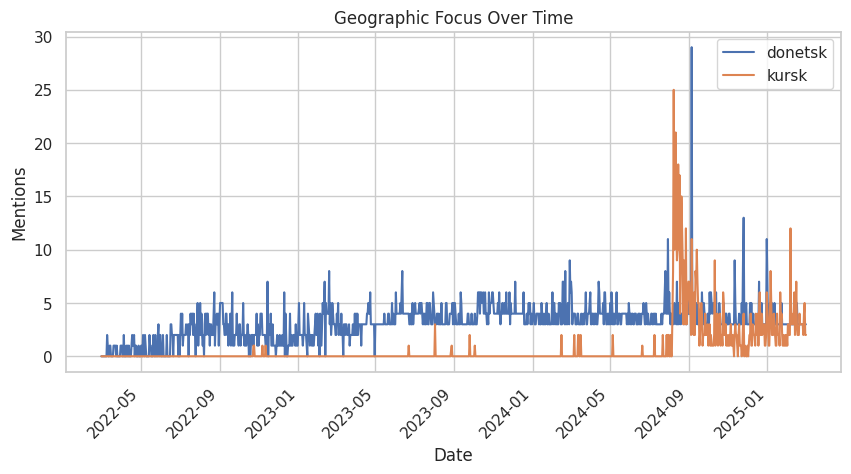

In [ ]:
# 11. Geographic Focus Analysis
df["kursk"] = df["Words"].apply(lambda words: words.count("kursk"))
geo_focus = df[['Date', 'donetsk', 'kursk']]
geo_focus.set_index('Date').plot(figsize=(10, 5))
plt.title("Geographic Focus Over Time")
plt.xlabel("Date")
plt.ylabel("Mentions")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*Although mentions of Kursk and Donetsk vary, there is a certain correlation, as spikes in mentions of one city often coincide with spikes in the other.
Thus, it is possible to suggest that there is some relationship between these cities based on the frequency of mentions in a given period.*

In [ ]:
# 12. Tabular summary
summary = df[["Year", "Month", "Day", "Word Count", "Unique Words",
              "ukrain", "ukrainian", 'russia', 'donetsk', 'kursk']]
print("=== Summary Table ===")
print(summary)

=== Summary Table ===
      Year  Month  Day  Word Count  Unique Words  ukrain  ukrainian  russia  \
0     2022      2   28         181           110       6          4       2   
1     2022      3    1         197           125       0          2       3   
2     2022      3    2         165            96       1          3       0   
3     2022      3    3         167           114       1          5       0   
4     2022      3    4         120            83       0          1       0   
...    ...    ...  ...         ...           ...     ...        ...     ...   
1075  2025      2   26         682           277      13         19       9   
1076  2025      2   27         633           245       9         17       5   
1077  2025      2   28         689           283       9         17       9   
1078  2025      3    1         743           292      23         18       5   
1079  2025      3    2         658           260      19         17       4   

      donetsk  kursk  
0     

#**Analysis ISW  tf-idf vectors**
---

##**Data Prepare**

In [ ]:
df1 = pd.read_csv('isw_data_without_num_stopword.csv')

In [ ]:
df1["Date"] = pd.to_datetime(df1[["Year", "Month", "Day"]])

In [ ]:
df1.head()

,Year,Month,Day,text_vector,Date
0,2022,2,28,0.007762,2022-02-28
1,2022,3,1,0.007433,2022-03-01
2,2022,3,2,0.006165,2022-03-02
3,2022,3,3,0.007813,2022-03-03
4,2022,3,4,0.006585,2022-03-04


##**Visualisation**
---

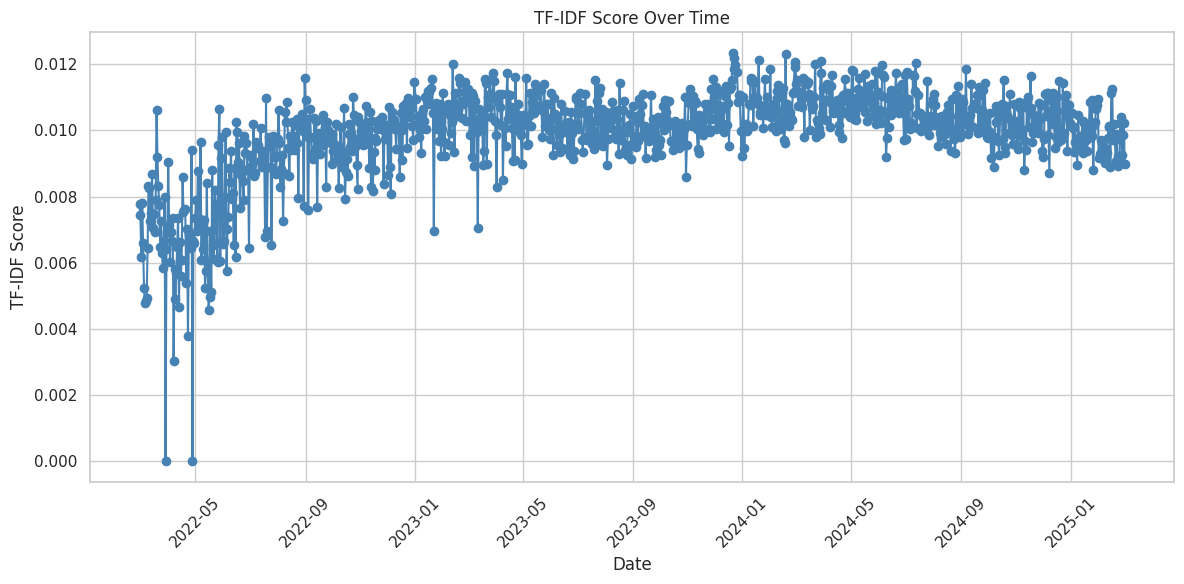

In [ ]:
# 1. Graph of change in tf-idf vector over time
plt.plot(df1["Date"], df1["text_vector"], marker="o", linestyle='-', color="steelblue")
plt.title("TF-IDF Score Over Time")
plt.xlabel("Date")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*The graph shows a gradual decrease in tf-idf values over time, with significant fluctuations, indicating changes in the importance of terms within the researched material.*

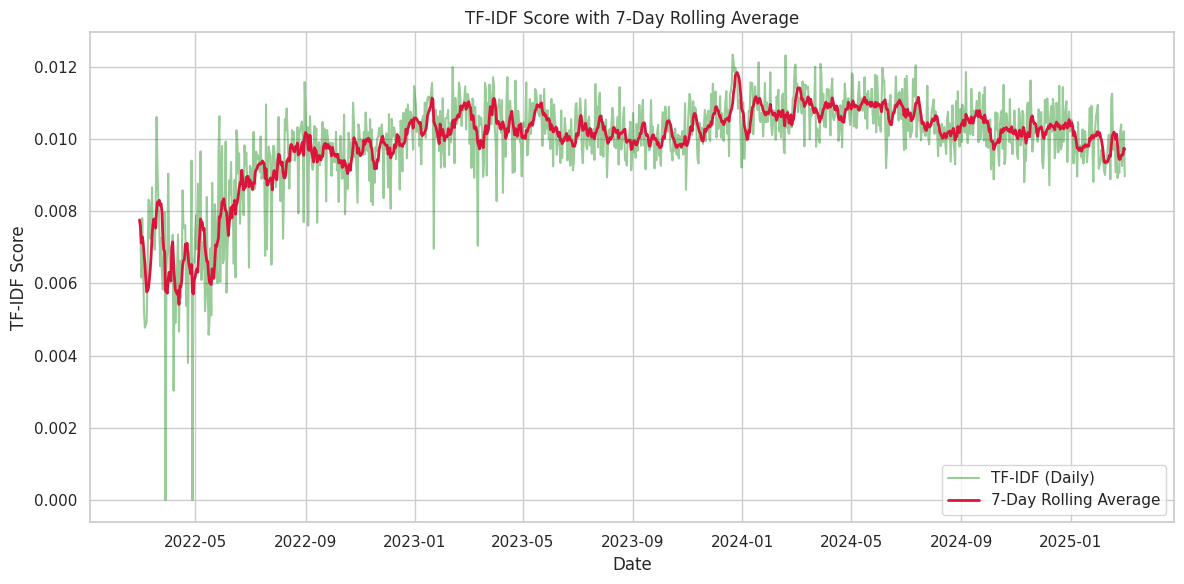

In [ ]:
#2. Moving average tf-idf (7 days)
df1["rolling_mean"] = df1["text_vector"].rolling(window=7, min_periods=1).mean()

plt.plot(df1["Date"], df1["text_vector"], alpha=0.4, label="TF-IDF (Daily)", color="green")
plt.plot(df1["Date"], df1["rolling_mean"], label="7-Day Rolling Average", color="crimson", linewidth=2)
plt.title("TF-IDF Score with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("TF-IDF Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


*The graph shows the variation of TF-IDF over time with a 7-day rolling average.
It indicates that the TF-IDF level is gradually decreasing throughout the observed period.*

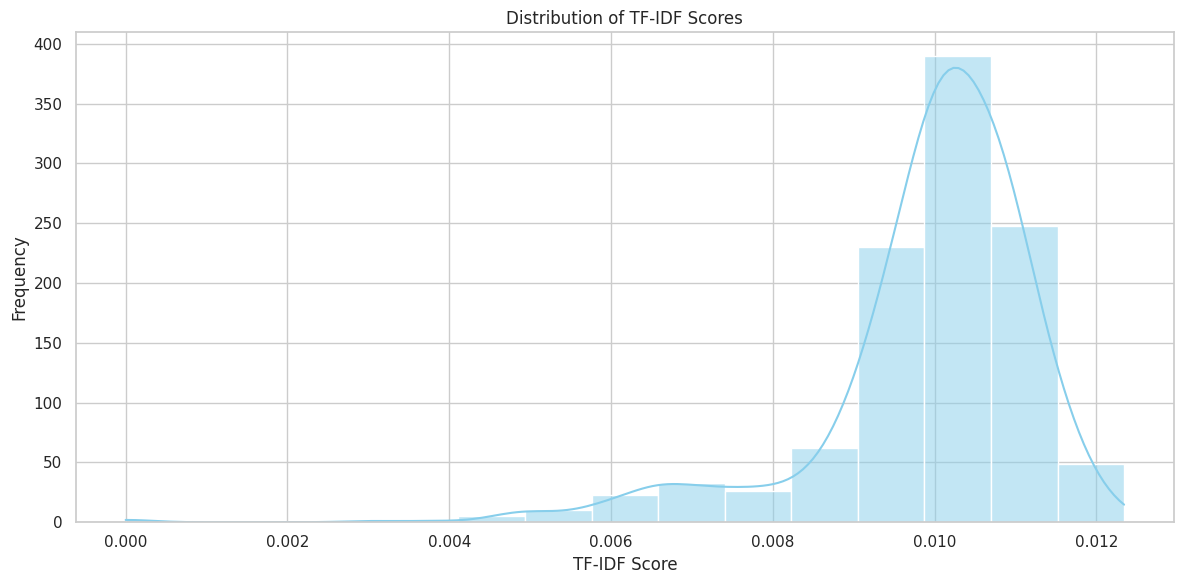

In [ ]:
# 3. Distribution of tf-idf values
sns.histplot(df1["text_vector"], bins=15, kde=True, color="skyblue")
plt.title("Distribution of TF-IDF Scores")
plt.xlabel("TF-IDF Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

*This histogram shows how often different tf-idf values ​​occur. This allows us to assess whether the reports are more "informative" or "fuzzy". Since the most common value is 0.010 out of a maximum of 0.012, we can say that the articles are quite informative.*

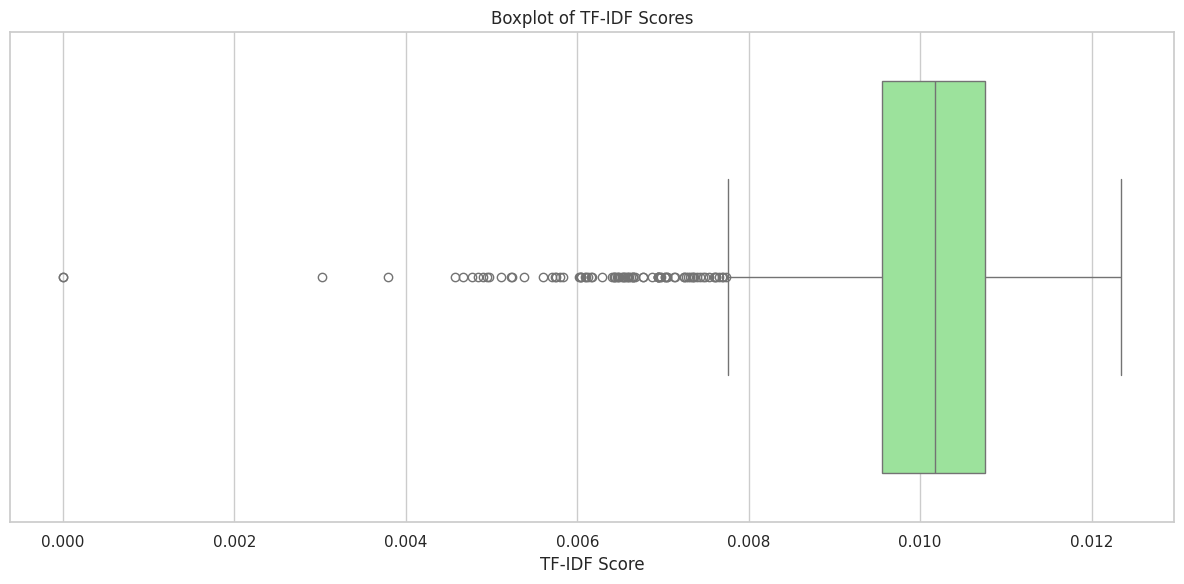

In [ ]:
# 4. Boxplot for anomaly detection
sns.boxplot(x=df1["text_vector"], color="lightgreen")
plt.title("Boxplot of TF-IDF Scores")
plt.xlabel("TF-IDF Score")
plt.tight_layout()
plt.show()

*In the graph, you can see many outliers located to the left of the box.*

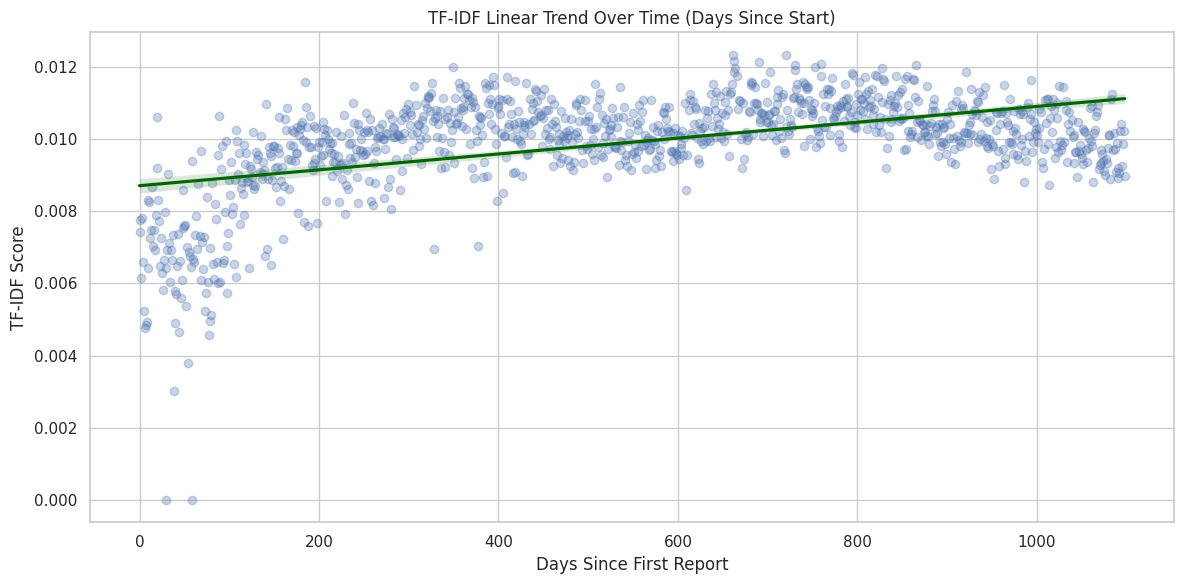

In [ ]:
# 5. TF-IDF Linear Trend Over Time (Days Since Start)
df1 = df1.sort_values("Date")
df1["day_number"] = (df1["Date"] - df1["Date"].min()).dt.days

sns.regplot(x="day_number", y="text_vector", data=df1, scatter_kws={"alpha": 0.3}, line_kws={"color": "darkgreen"})
plt.title("TF-IDF Linear Trend Over Time (Days Since Start)")
plt.xlabel("Days Since First Report")
plt.ylabel("TF-IDF Score")
plt.tight_layout()
plt.show()


*The graph shows a positive trend, meaning that TF-IDF values ​​are increasing over time. This may indicate:*

1. *increased analytical reporting;*

2. *increased thematic diversity;*

3. *accumulation of specialized vocabulary.*